# Detecting trend changes in angle



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn.feature_selection as feat_sel

import detect_simpsons_paradox as dsp
import sp_data_util as spdata
from sp_data_util import sp_plot
import itertools as itert

In [ ]:
r_clusters = -.9  # correlation coefficient of clusters
cluster_spread = [.6,.8,.5] # pearson correlation of means
p_sp_clusters = .75 # portion of clusters with SP 
k = [3, 2,5] # number of clusters
cluster_size = [7,1]
domain_range = [0, 20, 0, 20]
N = 200 # number of points
p_clusters =  [[1.0/k_i]*k_i for k_i in k] 
n_views = 3

many_sp_df_diff = spdata.geometric_indep_views_gmm_sp(n_views,r_clusters,cluster_size,cluster_spread,p_sp_clusters,
                domain_range,k,N,p_clusters)

sp_design_list = [('x1','x2','A'),('x3','x4','B'), ('x5','x6','C')]

,x1,x2,x3,x4,x5,x6,A,B,C
0,5.255197,9.824693,15.892740,12.265433,13.326141,6.003788,A1,B1,C2
1,13.777368,12.562098,7.436406,8.379405,11.993924,11.805921,A2,B0,C1
2,4.577775,9.436017,13.355785,14.216028,7.833729,5.668164,A1,B1,C3
3,4.176459,8.620258,14.431484,14.762443,12.376751,7.782771,A1,B1,C2
4,9.764321,7.506246,9.599664,6.812959,9.178024,15.574222,A0,B0,C4


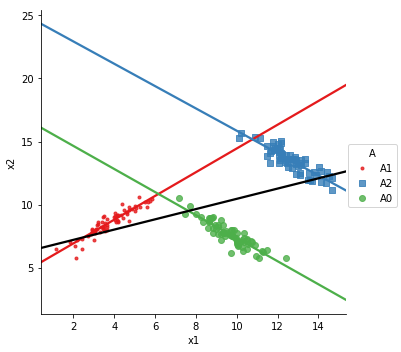

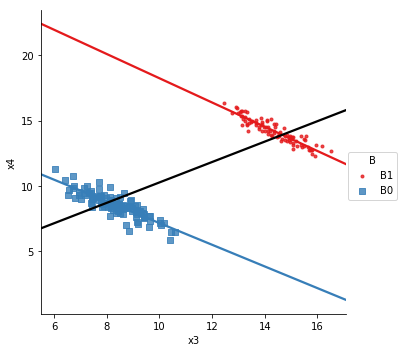

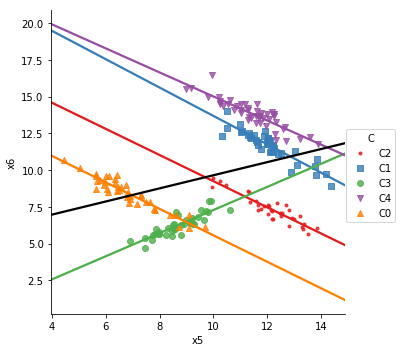

In [49]:
sp_plot(many_sp_df_diff,'x1','x2','A')
sp_plot(many_sp_df_diff,'x3','x4','B')
sp_plot(many_sp_df_diff,'x5','x6','C')
many_sp_df_diff.head()

In [45]:
many_sp_df_diff_result = dsp.mark_designed_rows(dsp.detect_simpsons_paradox(many_sp_df_diff),sp_design_list)
many_sp_df_diff_result

,allCorr,attr1,attr2,reverseCorr,groupbyAttr,subgroup,designed
0,0.562408,x1,x2,-0.902829,A,A0,True
1,0.005939,x1,x3,-0.017812,A,A0,False
2,0.072955,x1,x5,-0.031924,A,A0,False
3,0.011535,x1,x6,-0.025835,A,A0,False
4,-0.024968,x2,x3,0.123700,A,A0,False
5,-0.032656,x2,x4,0.219360,A,A0,False
6,-0.063660,x4,x5,0.019998,A,A0,False
7,0.005939,x1,x3,-0.145854,A,A1,False
8,0.072955,x1,x5,-0.110990,A,A1,False
9,0.011535,x1,x6,-0.193388,A,A1,False


In [30]:
many_sp_df_diff_result['designed'].value_counts()

False    48
True      8
Name: designed, dtype: int64

designed
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

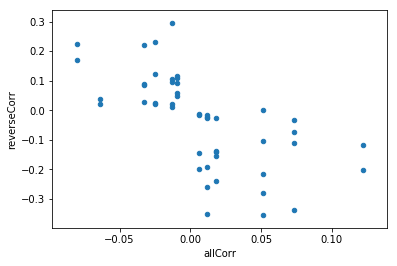

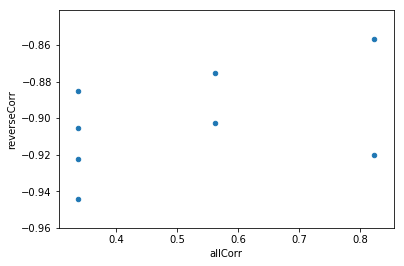

In [31]:
many_sp_df_diff_result.groupby('designed').plot('allCorr','reverseCorr',kind='scatter')

The first thing we can to to filter/ improve is to rank by the correlation coefficients. WHile somem of these may be strong relationships that are just highly nonlinenar, this is a first pass filter to remove false relationships. 

In [51]:
results_df_slopes.groupby('designed')['allCorr'].describe()

,count,mean,std,min,25%,50%,75%,max
designed,,,,,,,,
False,48.0,0.007205,0.044540,-0.079972,-0.015923,0.005939,0.017934,0.121757
True,8.0,0.515418,0.213414,0.338270,0.338270,0.450339,0.627487,0.822726


Next we can look at angles between lines

In [32]:
many_sp_df_diff_result.head(2)

,allCorr,attr1,attr2,reverseCorr,groupbyAttr,subgroup,designed
0,0.562408,x1,x2,-0.902829,A,A0,True
1,0.005939,x1,x3,-0.017812,A,A0,False


In [33]:
many_sp_df_diff.head(2)

,x1,x2,x3,x4,x5,x6,A,B,C
0,5.255197,9.824693,15.892740,12.265433,13.326141,6.003788,A1,B1,C2
1,13.777368,12.562098,7.436406,8.379405,11.993924,11.805921,A2,B0,C1


In [42]:
def get_slope_sp(data_df, result_df):
    #compute whole data slopes
    # iterate rows of result df
    new_res = result_df
    slope_list = []
    for i,row in result_df.iterrows():
        # extract data for that row
        data_rows = data_df.loc[data_df[row['groupbyAttr']]==row['subgroup']]
        attr1data = data_rows[row['attr1']]
        attr2data = data_rows[row['attr2']]
        # comput lin regress for data according to that row
        slope, intercept, r_value, p_value, std_err = stats.linregress(attr1data,attr2data)
        slope_list.append(slope)
        
    new_res['subgroup_slope'] = slope_list
    return new_res

def get_slope_all(data_df,data_cols):
    all_slopes = []
    for a,b in itert.combinations(data_cols,2):
    # compute each slope    
        slope, intercept, r_value, p_value, std_err = stats.linregress(data_df[a],data_df[b])
        all_slopes.append([a,b,slope])
    
    #save as df
    all_slopes_df = pd.DataFrame(data = all_slopes, columns = ['attr1','attr2','all_slope'])
    return all_slopes_df

def compute_angle(row):
    theta_sub = np.arctan(row['subgroup_slope'])
    theta_all = np.arctan(row['all_slope'])
    return np.rad2deg(theta_all - theta_sub)

In [47]:
results_df_slopes = get_slope_sp(many_sp_df_diff, many_sp_df_diff_result)
all_slopes_df = get_slope_all(many_sp_df_diff, ['x' +str(i+1) for i in range(n_views*2)])
results_df_slopes = results_df_slopes.merge(all_slopes_df, left_on=['attr1','attr2'], right_on=['attr1','attr2'])
results_df_slopes['angle'] = results_df_slopes.apply(compute_angle,axis=1)
results_df_slopes.head()

,allCorr,attr1,attr2,reverseCorr,groupbyAttr,subgroup,designed,subgroup_slope,all_slope,angle
0,0.562408,x1,x2,-0.902829,A,A0,True,-0.914458,0.406570,64.566778
1,0.562408,x1,x2,-0.875484,A,A2,True,-0.885259,0.406570,63.642324
2,0.005939,x1,x3,-0.017812,A,A0,False,-0.057354,0.004905,3.563524
3,0.005939,x1,x3,-0.145854,A,A1,False,-0.447615,0.004905,24.395023
4,0.005939,x1,x3,-0.013940,C,C3,False,-0.010510,0.004905,0.883156


In [48]:
results_df_slopes.groupby('designed')['angle'].describe()

,count,mean,std,min,25%,50%,75%,max
designed,,,,,,,,
False,48.0,1.08358,14.953015,-37.852145,-3.557627,1.057924,6.236668,39.864128
True,8.0,68.72721,6.714622,63.337088,64.335665,65.874486,70.431289,80.835625


In [ ]:
sp_plot(many_sp_df_diff,'x2','x4','A')

In [ ]:
many_sp_df_diff.columns

Another way we might want to examine the subgroups is to see if the errors to the whole data set model orelate with class.  Ths is if the errors are hihgly deparable, thn 